In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from plotly import graph_objects as go
from collections import Counter
import plotly.graph_objects as go
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [10]:
df = pd.read_csv(r'C:\Users\HP\Downloads\netflix_titles.csv.zip')

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [18]:
netflix_shows = df[df['type'] == 'TV Show'].copy()

In [19]:
netflix_movies = df[df['type'] == 'Movie'].copy()

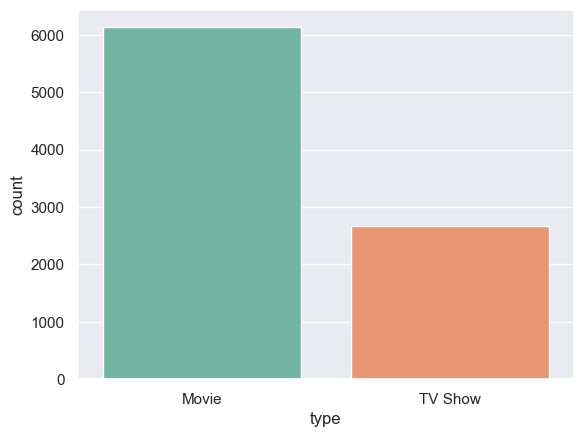

In [20]:
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'type',data=df, palette = 'Set2')

# Popular duration time

In [21]:
topdirs  = pd.value_counts(df['duration'])
topdirs

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: duration, Length: 220, dtype: int64

In [24]:
fig = go.Figure([
    go.Bar(x=topdirs.index, y=topdirs.values, text= topdirs.values, marker_color = 'indianred')
])
fig.update_traces(texttemplate = '%{text:.2s}',textposition = 'outside')
fig.show()


# Film Analysis 

In [33]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [34]:
netflix_date = netflix_shows[['date_added']].dropna()
netflix_date.isnull().sum()

date_added    0
dtype: int64

In [27]:
netflix_date

,date_added
1,"September 24, 2021"
2,"September 24, 2021"
3,"September 24, 2021"
4,"September 24, 2021"
5,"September 24, 2021"
...,...
8795,"May 1, 2018"
8796,"January 17, 2017"
8797,"September 13, 2018"
8800,"December 15, 2016"


In [28]:
netflix_date['year'] = netflix_date['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x: x.lstrip().split(' ')[0])
netflix_date

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September
...,...,...,...
8795,"May 1, 2018",2018,May
8796,"January 17, 2017",2017,January
8797,"September 13, 2018",2018,September
8800,"December 15, 2016",2016,December


In [29]:
netflix_date.sort_values(by =['year', 'month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October
...,...,...,...
153,"September 1, 2021",2021,September
154,"September 1, 2021",2021,September
160,"September 1, 2021",2021,September
165,"September 1, 2021",2021,September


In [30]:
netflix_date['month'].unique()

array(['September', 'August', 'July', 'June', 'May', 'April', 'March',
       'February', 'January', 'December', 'November', 'October'],
      dtype=object)

In [31]:
month_order = ['January', 'February','March','April', 'May','June', 'July', 'August', 'September','October','November', 'December']

In [32]:
drt = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
drt

year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
January,0.0,0.0,0.0,0.0,28.0,14.0,24.0,37.0,53.0,36.0
February,1.0,0.0,1.0,1.0,6.0,17.0,24.0,45.0,42.0,44.0
March,0.0,1.0,0.0,2.0,3.0,38.0,35.0,53.0,44.0,37.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0


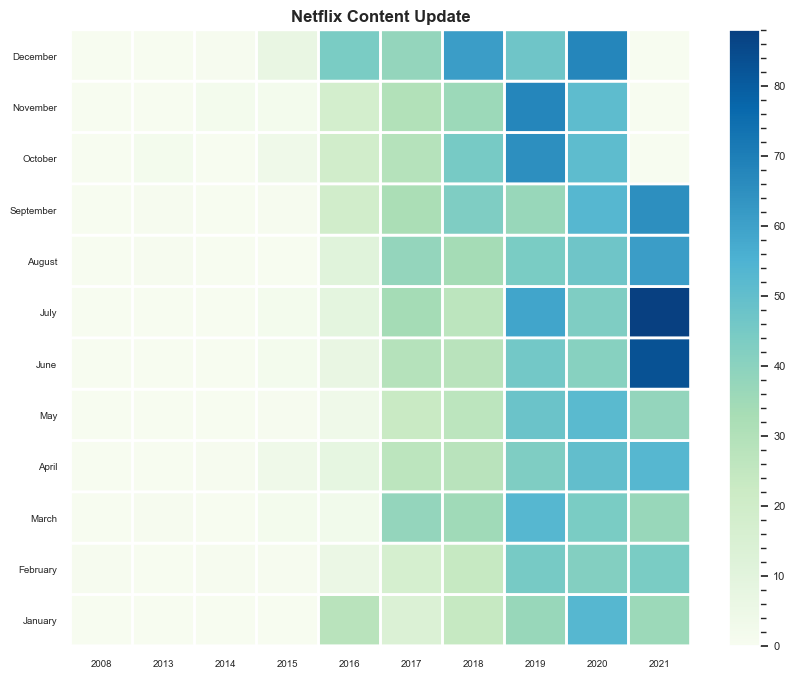

In [35]:
plt.figure(figsize = (10,8), dpi = 100)
plt.pcolor(drt, cmap = 'GnBu',edgecolors = 'white', linewidths = 2)
plt.xticks(np.arange(0.5, len(drt.columns), 1),drt.columns, fontsize = 7)
plt.yticks(np.arange(0.5, len(drt.index), 1), drt.index, fontsize = 7)

plt.title('Netflix Content Update', fontsize = 12, fontweight = 'bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize = 8)
cbar.ax.minorticks_on()
plt.show()

# Analysis Movie Rating 

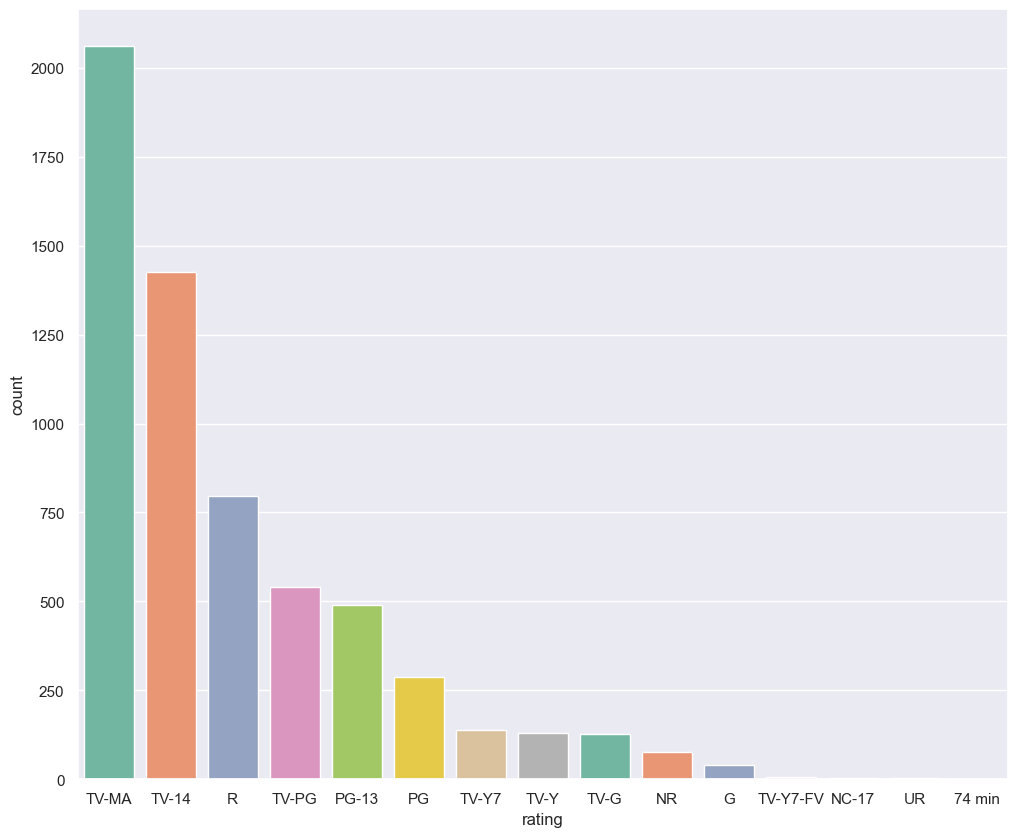

In [36]:
plt.figure(figsize = (12,10))
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'rating', data = netflix_movies, palette = 'Set2', order = netflix_movies['rating'].value_counts().index[0:15])

# Film release year analysis

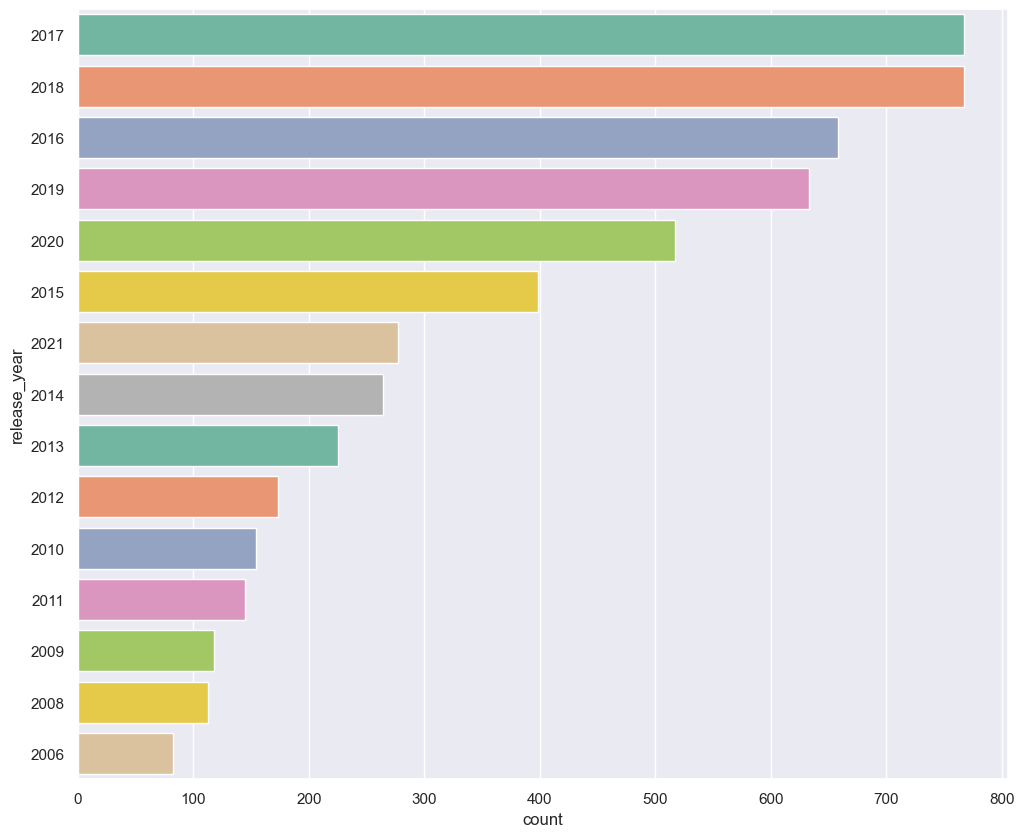

In [37]:
plt.figure(figsize = (12,10))
sns.set(style = 'darkgrid')
ax = sns.countplot(y = 'release_year', data = netflix_movies, palette = 'Set2', order = netflix_movies['release_year'].value_counts().index[0:15])

# Top 10 countries that produce films 

In [38]:
netflix_movies.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [40]:
netflix_movies['country'].fillna('Unknown', inplace = True)
netflix_movies.isnull().sum()

show_id           0
type              0
title             0
director        188
cast            475
country           0
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64

In [41]:
netflix_movies['country'].value_counts()

United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: country, Length: 652, dtype: int64

In [42]:
country_mov = {}
cou = list(netflix_movies['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))
    
    for j in i:
        if j in list(country_mov.keys()):
            country_mov[j] +=1
        else:
            country_mov[j] = 1

In [43]:
country_mov

{'UnitedStates': 2752,
 'Unknown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [44]:
countries_fin  = sorted(country_mov.items(), key = lambda item: country_mov[item[0]], reverse = True)
countries_fin = countries_fin[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [45]:
names = [name for name, value in countries_fin]
names

['UnitedStates',
 'India',
 'UnitedKingdom',
 'Unknown',
 'Canada',
 'France',
 'Germany',
 'Spain',
 'Japan',
 'China']

In [46]:
values = [values for values, values in countries_fin]
values

[2752, 962, 534, 440, 319, 303, 182, 171, 119, 114]

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'India'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'France'),
 Text(6, 0, 'Germany'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'China')]

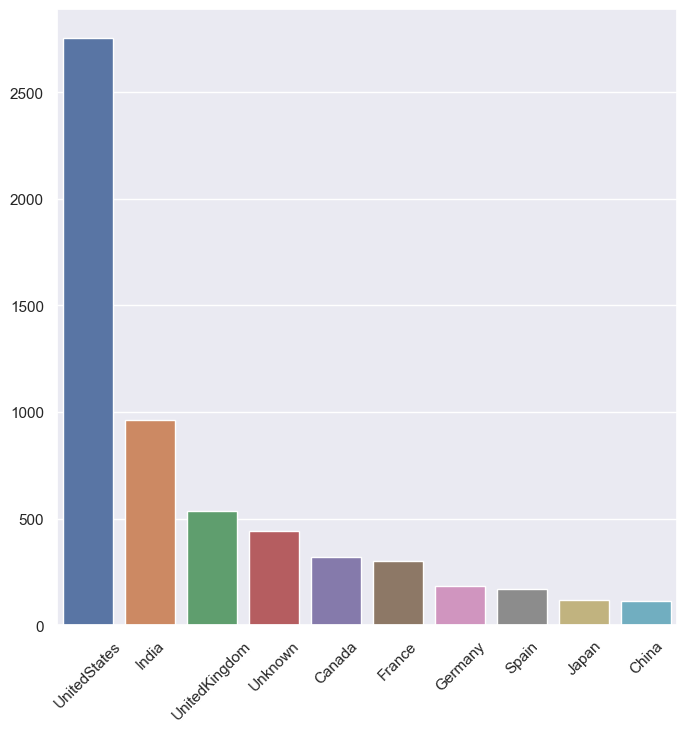

In [47]:
plt.figure(figsize = (8,8))
ax = sns.barplot(x= names , y = values)
ax.set_xticklabels(names, rotation = 45)

# Movie length Analysis 

In [48]:
netflix_movies['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [49]:
netflix_movies['duration'].isnull().sum()

3

In [50]:
netflix_movies['duration'] = pd.to_numeric(netflix_movies['duration'].str.replace(' min', ''), errors='coerce')

median_duration = netflix_movies['duration'].median()
netflix_movies['duration'] = netflix_movies['duration'].fillna(median_duration)

netflix_movies['duration'] = netflix_movies['duration'].astype(int)

In [51]:
netflix_movies['duration']

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6131, dtype: int32

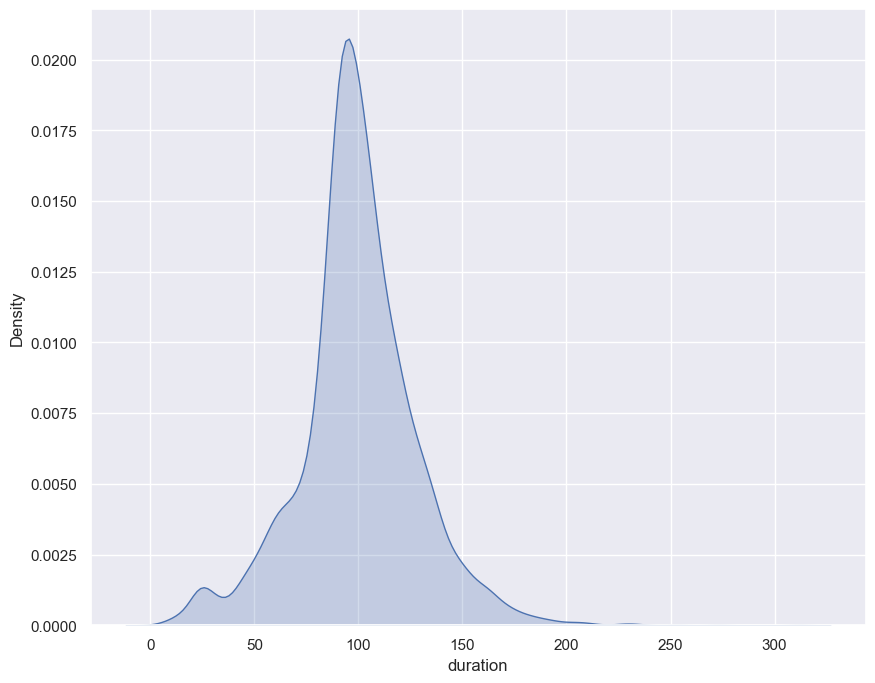

In [53]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,8))
sns.kdeplot(data = netflix_movies['duration'], fill= True);

# Genre Analysis 

In [54]:
netflix_movies['listed_in']

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [55]:
genres = list(netflix_movies['listed_in'])
gen  = []
for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

In [56]:
g = sorted(g.items(), key = lambda item: g[item[0]], reverse = True)

In [57]:
g

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('Faith&Spirituality', 65),
 ('Movies', 57)]

In [58]:
genre_names = [name for name , value in g]
genre_names

['InternationalMovies',
 'Dramas',
 'Comedies',
 'Documentaries',
 'Action&Adventure',
 'IndependentMovies',
 'Children&FamilyMovies',
 'RomanticMovies',
 'Thrillers',
 'Music&Musicals',
 'HorrorMovies',
 'Stand-UpComedy',
 'Sci-Fi&Fantasy',
 'SportsMovies',
 'ClassicMovies',
 'LGBTQMovies',
 'AnimeFeatures',
 'CultMovies',
 'Faith&Spirituality',
 'Movies']

In [59]:
genre_values = [value for name ,value in g]
genre_values

[2752,
 2427,
 1674,
 869,
 859,
 756,
 641,
 616,
 577,
 375,
 357,
 343,
 243,
 219,
 116,
 102,
 71,
 71,
 65,
 57]

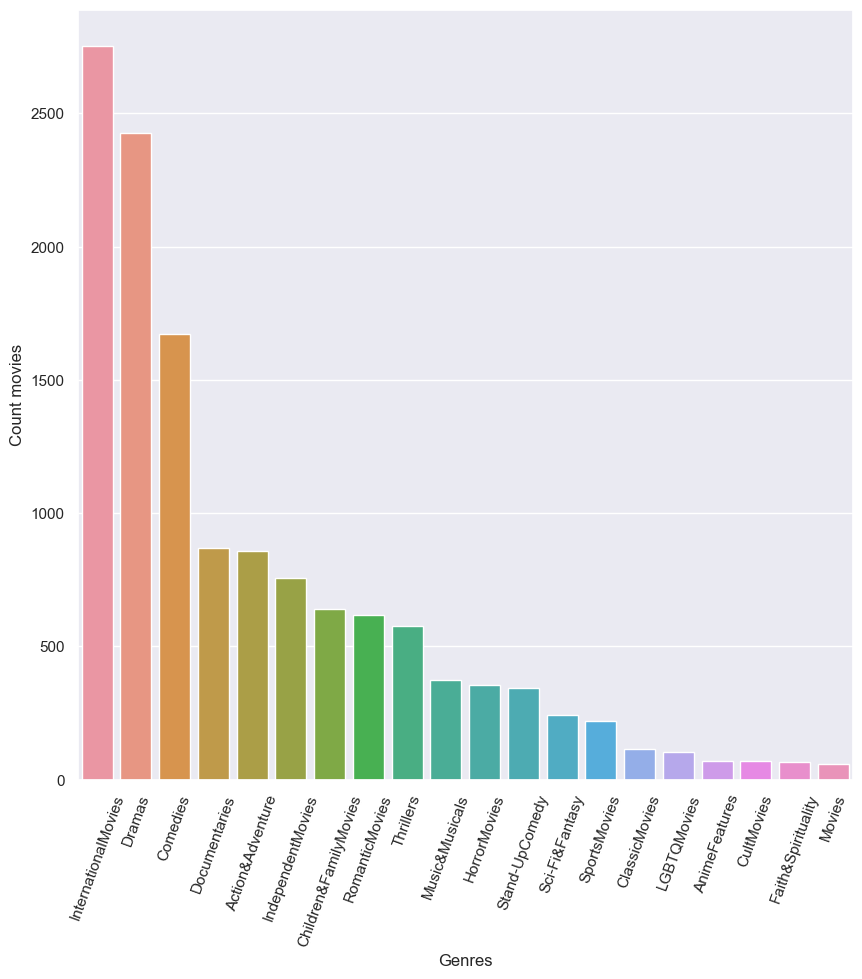

In [60]:
fig = plt.figure(figsize =(10,10))
ax = sns.barplot(x = genre_names, y = genre_values)

ax.set_xticklabels(genre_names, rotation =70)
ax.set_ylabel('Count movies')
ax.set_xlabel('Genres')
plt.show()


# Series Analysis 

In [62]:
netflix_shows.isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [63]:
netflix_shows['country'].fillna('Unknown', inplace = True)
netflix_shows.isnull().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [64]:
netflix_shows['country'].value_counts()

United States                                    760
Unknown                                          391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 197, dtype: int64

In [66]:
countries_show = {}
cout = list(netflix_shows['country'])
for i in cou:
    i = i.replace(' ', '')
    i = list(i.split(','))
    
    for j in i:
        if j in list(countries_show.keys()):
            countries_show[j] +=1
        else:
            countries_show[j] = 1

In [67]:
countries_show

{'UnitedStates': 2752,
 'Unknown': 440,
 'Ghana': 5,
 'BurkinaFaso': 1,
 'UnitedKingdom': 534,
 'Germany': 182,
 'Ethiopia': 1,
 'CzechRepublic': 16,
 'India': 962,
 'France': 303,
 'China': 114,
 'Canada': 319,
 'SouthAfrica': 51,
 'Japan': 119,
 'Nigeria': 94,
 'Spain': 171,
 'Australia': 94,
 'Mexico': 111,
 'Italy': 75,
 'Romania': 14,
 'Argentina': 71,
 'Venezuela': 4,
 'HongKong': 100,
 'Nepal': 2,
 'NewZealand': 25,
 'Brazil': 66,
 'Greece': 9,
 'Colombia': 20,
 'Belgium': 78,
 'Switzerland': 18,
 'Bulgaria': 10,
 '': 6,
 'Algeria': 3,
 'Poland': 32,
 'Israel': 19,
 'SaudiArabia': 9,
 'Thailand': 46,
 'Indonesia': 86,
 'Egypt': 102,
 'Denmark': 34,
 'Kuwait': 5,
 'Netherlands': 42,
 'Singapore': 18,
 'Malaysia': 18,
 'SouthKorea': 61,
 'Vietnam': 7,
 'Hungary': 10,
 'Lebanon': 24,
 'Syria': 2,
 'Philippines': 80,
 'UnitedArabEmirates': 36,
 'Sweden': 31,
 'Qatar': 10,
 'Mauritius': 1,
 'Austria': 11,
 'Turkey': 83,
 'Russia': 11,
 'Taiwan': 19,
 'Cameroon': 1,
 'Palestine': 1,
 

In [68]:
countries_fin2 = sorted(countries_show.items(), key =  lambda item: countries_show[item[0]], reverse = True)
countries_fin2 = countries_fin2[:10]
countries_fin2

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [69]:
names = [name  for name, value in countries_fin2]
names

['UnitedStates',
 'India',
 'UnitedKingdom',
 'Unknown',
 'Canada',
 'France',
 'Germany',
 'Spain',
 'Japan',
 'China']

In [70]:
values = [value for name, value in countries_fin2]
values

[2752, 962, 534, 440, 319, 303, 182, 171, 119, 114]

In [71]:
values = [value for name, value in countries_fin2]
values

[2752, 962, 534, 440, 319, 303, 182, 171, 119, 114]

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'India'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'France'),
 Text(6, 0, 'Germany'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'China')]

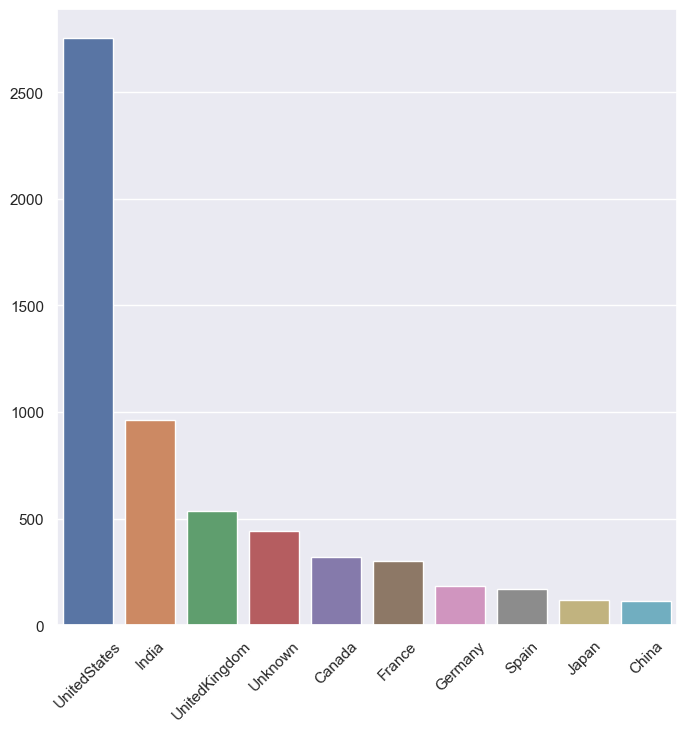

In [72]:
plt.figure(figsize = (8,8))
ax = sns.barplot(x= names, y = values)
ax.set_xticklabels(names, rotation = 45)

# TV series with many seasons 

In [73]:
features = ['title', 'duration']
durations = netflix_shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [74]:
durations['no_of_seasons'] = durations['duration'].str.replace(' Season', '')
durations

C:\Users\HP\AppData\Local\Temp\ipykernel_31696\1205882244.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2s
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2s
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2s
8796,Yunus Emre,2 Seasons,2s
8797,Zak Storm,3 Seasons,3s
8800,Zindagi Gulzar Hai,1 Season,1


In [75]:
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')
durations

C:\Users\HP\AppData\Local\Temp\ipykernel_31696\334835126.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [76]:
durations['no_of_seasons'] = durations['no_of_seasons'].str.replace('s', '')
durations

C:\Users\HP\AppData\Local\Temp\ipykernel_31696\334835126.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [77]:
durations['no_of_seasons'] = durations['no_of_seasons'].astype(str).astype(int)
durations

C:\Users\HP\AppData\Local\Temp\ipykernel_31696\1104603247.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


In [78]:
t = ['title', 'no_of_seasons']
top = durations[t]

top = top.sort_values(by = 'no_of_seasons', ascending = False)

([<matplotlib.axis.XTick at 0x29918cf3850>,
 [Text(0.0, 0, "Grey's Anatomy"),
  Text(1.0, 0, 'Supernatural'),
  Text(2.0, 0, 'NCIS'),
  Text(3.0, 0, 'Heartland'),
  Text(4.0, 0, 'COMEDIANS of the world'),
  Text(5.0, 0, 'Red vs. Blue'),
  Text(6.0, 0, 'Trailer Park Boys'),
  Text(7.0, 0, 'Criminal Minds'),
  Text(8.0, 0, 'Frasier'),
  Text(9.0, 0, 'Cheers'),
  Text(10.0, 0, 'Shameless (U.S.)'),
  Text(11.0, 0, 'Friends'),
  Text(12.0, 0, 'LEGO Ninjago: Masters of Spinjitzu'),
  Text(13.0, 0, 'Danger Mouse: Classic Collection'),
  Text(14.0, 0, 'The Walking Dead'),
  Text(15.0, 0, 'Stargate SG-1'),
  Text(16.0, 0, "Dad's Army"),
  Text(17.0, 0, 'The Great British Baking Show'),
  Text(18.0, 0, 'Forensic Files'),
  Text(19.0, 0, 'The Office (U.S.)')])

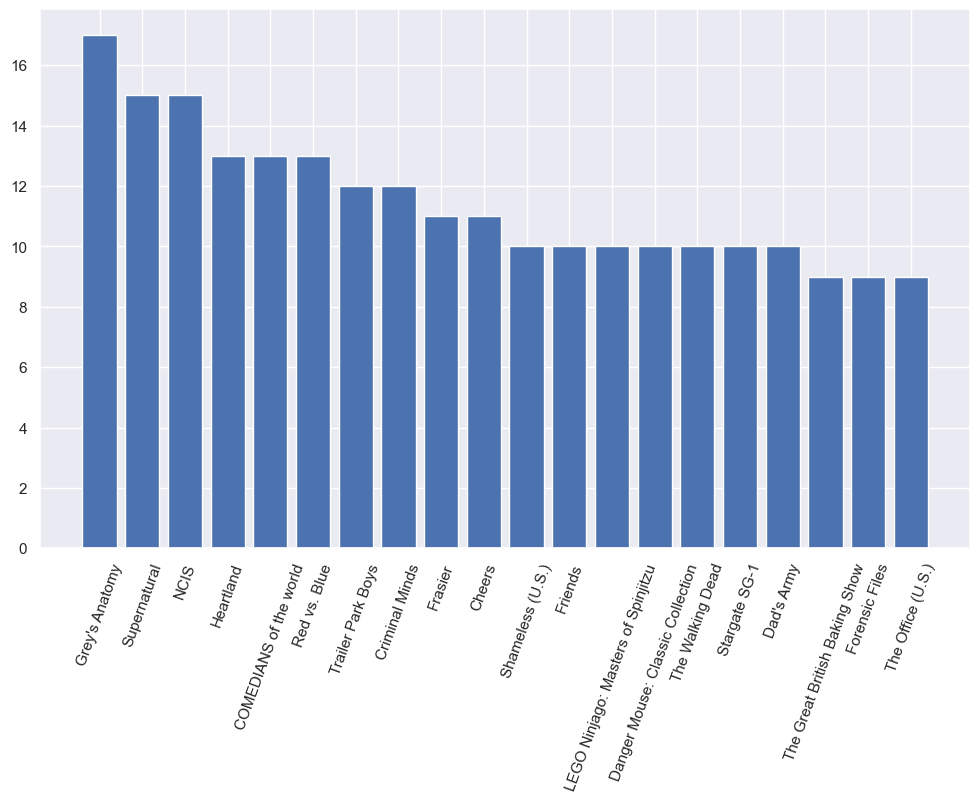

In [79]:
top20 = top[0:20]
plt.figure(figsize = (12,7))

plt.bar(top20['title'], top20['no_of_seasons'])
plt.xticks(top20['title'], rotation= 70)

# Fewest number of seasons 

In [80]:
bottom = top.sort_values(by = 'no_of_seasons')
bottom = bottom[20:50]
fig = go.Figure(
    data = [
        go.Table(header = dict(values = ['Title', 'No of seasons']),
                cells = dict(values = [bottom['title'], bottom['no_of_seasons']]))
    ])
fig.show()

# Gener Analysis 

In [81]:
netflix_shows['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
                              ...                        
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
8803               Kids' TV, Korean TV Shows, TV Comedies
Name: listed_in, Length: 2676, dtype: object

In [82]:
genres = list(netflix_shows['listed_in'])
gen = []
for i in genres :
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

In [83]:
g = sorted(g.items(), key = lambda item: g[item[0]], reverse = True)
g

[('InternationalTVShows', 1351),
 ('TVDramas', 763),
 ('TVComedies', 581),
 ('CrimeTVShows', 470),
 ("Kids'TV", 451),
 ('Docuseries', 395),
 ('RomanticTVShows', 370),
 ('RealityTV', 255),
 ('BritishTVShows', 253),
 ('AnimeSeries', 176),
 ('Spanish-LanguageTVShows', 174),
 ('TVAction&Adventure', 168),
 ('KoreanTVShows', 151),
 ('TVMysteries', 98),
 ('Science&NatureTV', 92),
 ('TVSci-Fi&Fantasy', 84),
 ('TVHorror', 75),
 ('TeenTVShows', 69),
 ('TVThrillers', 57),
 ('Stand-UpComedy&TalkShows', 56),
 ('Classic&CultTV', 28),
 ('TVShows', 16)]

In [84]:
genre_names = [name for name , value in g]
genre_names

['InternationalTVShows',
 'TVDramas',
 'TVComedies',
 'CrimeTVShows',
 "Kids'TV",
 'Docuseries',
 'RomanticTVShows',
 'RealityTV',
 'BritishTVShows',
 'AnimeSeries',
 'Spanish-LanguageTVShows',
 'TVAction&Adventure',
 'KoreanTVShows',
 'TVMysteries',
 'Science&NatureTV',
 'TVSci-Fi&Fantasy',
 'TVHorror',
 'TeenTVShows',
 'TVThrillers',
 'Stand-UpComedy&TalkShows',
 'Classic&CultTV',
 'TVShows']

In [85]:
genre_values = [value for name, value in g]
genre_values

[1351,
 763,
 581,
 470,
 451,
 395,
 370,
 255,
 253,
 176,
 174,
 168,
 151,
 98,
 92,
 84,
 75,
 69,
 57,
 56,
 28,
 16]

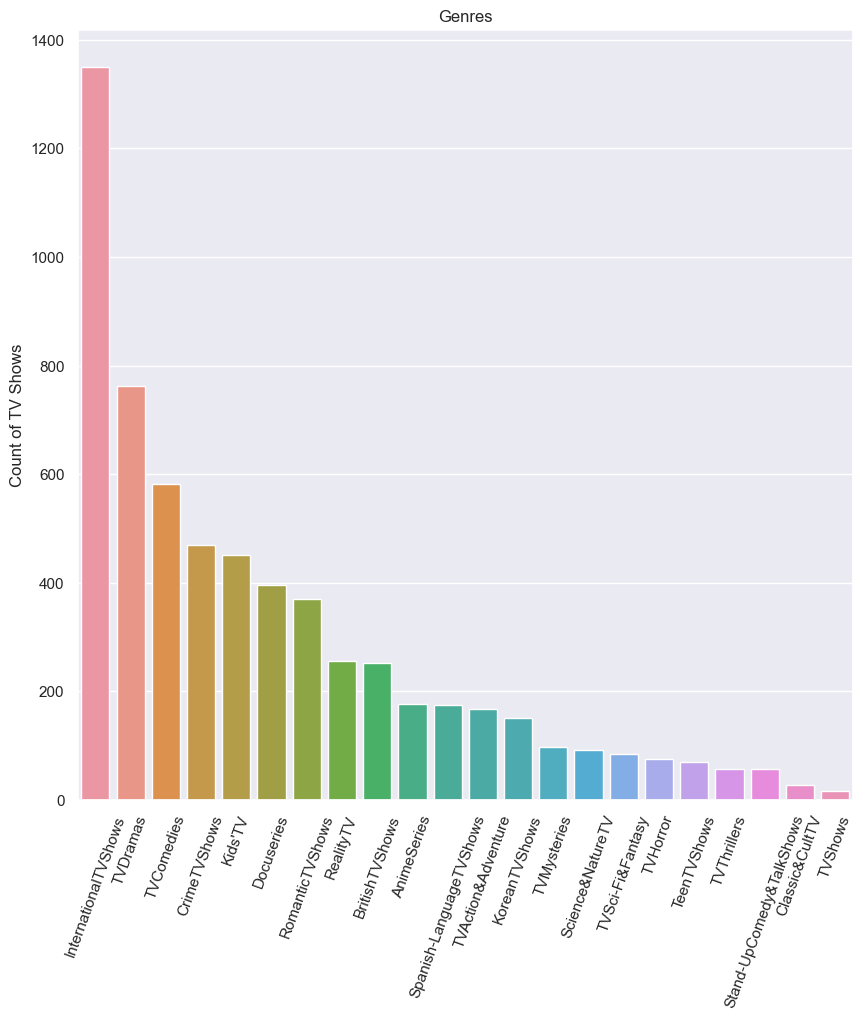

In [86]:
fig = plt.figure(figsize = (10,10))
ax = sns.barplot(x = genre_names, y =  genre_values)
ax.set_xticklabels(genre_names, rotation = 70)
ax.set_ylabel('Count of TV Shows')
ax.set_title('Genres');

# Analysis and duration of series 

In [87]:
durations[t]

,title,no_of_seasons
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1
...,...,...
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3
8800,Zindagi Gulzar Hai,1


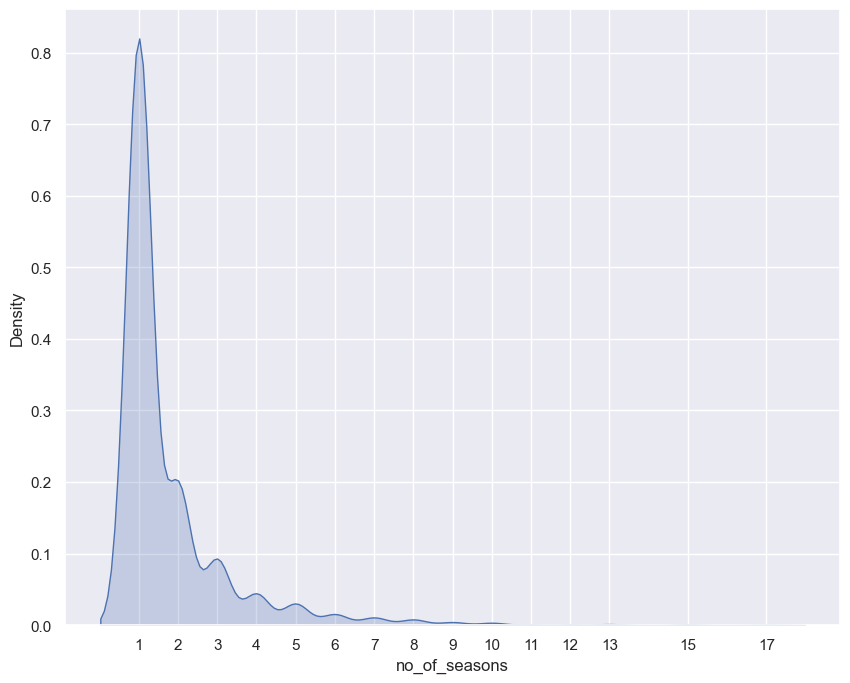

In [88]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (10,8))
sns.kdeplot(data = durations['no_of_seasons'], fill = True)
plt.xticks(sorted(durations['no_of_seasons'].unique()));

# Recommendation(content based)

In [89]:
netflix_movies['description']

0       As her father nears the end of his life, filmm...
6       Equestria's divided. But a bright-eyed hero be...
7       On a photo shoot in Ghana, an American model s...
9       A woman adjusting to life after a loss contend...
12      After most of her family is murdered in a terr...
                              ...                        
8801    Recovering alcoholic Talal wakes up inside a s...
8802    A political cartoonist, a crime reporter and a...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 6131, dtype: object

In [90]:
netflix_movies['description'] = netflix_movies['description'].fillna('')
netflix_movies['description'].isnull().sum()

0

In [91]:
netflix_movies['description'].head()

0     As her father nears the end of his life, filmm...
6     Equestria's divided. But a bright-eyed hero be...
7     On a photo shoot in Ghana, an American model s...
9     A woman adjusting to life after a loss contend...
12    After most of her family is murdered in a terr...
Name: description, dtype: object

In [92]:
tfidf = TfidfVectorizer(stop_words = 'english')
tfidf_matrix = tfidf.fit_transform(netflix_movies['description'])
tfidf_matrix.shape

(6131, 15483)

In [93]:
cosine_sim = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01624469,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.03650444],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01624469, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.03650444, ..., 0.        , 0.        ,
        1.        ]])

In [94]:
indices = pd.Series(netflix_movies.index, index = netflix_movies['title']).drop_duplicates()
indices

title
Dick Johnson Is Dead                   0
My Little Pony: A New Generation       6
Sankofa                                7
The Starling                           9
Je Suis Karl                          12
                                    ... 
Zinzana                             8801
Zodiac                              8802
Zombieland                          8804
Zoom                                8805
Zubaan                              8806
Length: 6131, dtype: int64

In [95]:
cosine_sim_df = pd.DataFrame(cosine_sim)

cosine_sim_df.columns = indices.index

cosine_sim_df['title'] = indices.index
cosine_sim_df = cosine_sim_df.set_index('title')

cosine_sim_df.head()

title,Dick Johnson Is Dead,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Europe's Most Dangerous Man: Otto Skorzeny in Spain,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.0,0.0,0.018285,0.000000,0.0,0.014848,0.0,0.023927,0.0,...,0.0,0.02889,0.0,0.0,0.0,0.0,0.0,0.000000,0.016245,0.000000
My Little Pony: A New Generation,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.029736,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036504
The Starling,0.018285,0.0,0.0,1.000000,0.029133,0.0,0.016294,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.061674,0.017826,0.045998
Je Suis Karl,0.000000,0.0,0.0,0.029133,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028473


In [96]:
def get_recomandations(title, cosine_sim  = cosine_sim_df):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim_df.loc[title]))
    
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:11]
    
    movie_indicies = [i[0] for i in sim_scores]
    return netflix_movies['title'].iloc[movie_indicies]

In [97]:
netflix_movies[netflix_movies['title'] == 'Last Breath'].description.iloc[0]

'A commercial diver becomes trapped on the ocean floor with dwindling oxygen and little hope of a timely rescue, so he tries to save himself.'

In [98]:
get_recomandations('Last Breath')

7061                                          In The Deep
940                        Motu Patlu: Deep Sea Adventure
2703                                               Mine 9
6466                                       Chicken Little
7616                               NOVA: Thai Cave Rescue
636                                          The Ice Road
5773    My Little Pony Equestria Girls: Legend of Ever...
4616                                          Big Miracle
895                                                Oxygen
3070                                              Posesif
Name: title, dtype: object

In [99]:
netflix_movies[netflix_movies['title'] == 'In The Deep'].description.iloc[0]

'With little oxygen left in their scuba tanks, two sisters are trapped in a shark cage at the bottom of the ocean while great whites circle nearby.'